In [1]:
"""
Purpose: To decompose the multi-somas for splitting
using the new decomposition method



"""

'\nPurpose: To decompose the multi-somas for splitting\nusing the new decomposition method\n\n\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-02-01 19:06:48,305 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-01 19:06:48,306 - settings - Setting database.user to celiib
INFO - 2021-02-01 19:06:48,306 - settings - Setting database.password to newceliipass
INFO - 2021-02-01 19:06:48,309 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-01 19:06:48,312 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-01 19:06:48,324 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-01 19:06:48,615 - settings - Setting enable_python_native_blobs to True


In [3]:
#so that it will have the adapter defined
from datajoint_utils import *

In [4]:
test_mode = True

# Debugging the contains method

In [5]:
import system_utils as su

In [6]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-01 19:06:48,669 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-01 19:06:48,669 - settings - Setting database.user to celiib
INFO - 2021-02-01 19:06:48,670 - settings - Setting database.password to newceliipass
INFO - 2021-02-01 19:06:48,673 - settings - Setting enable_python_native_blobs to True


Sleeping 161 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-02-01 19:06:48,952 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [7]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [8]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 1127


In [9]:
# minnie.DecompositionSplit.drop()
# schema.external['decomposition'].delete(delete_external_files=True)

In [10]:
key_source = minnie.Decomposition() & (minnie.AllenProofreading() & dict(month=1,day=28,year=2021)).proj()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134964412191,0,0.25,30.00,0,0,1,=BLOB=,835640,1690988,0,1,0,1,2,11,195,86,6628171.297195275,3149378.4810814066,22804.636,342.677,279.607,545.825,515.107,4609,0.0006953652513401861,23.635897435897437,6205683.345,179,0.0007427062812854497,25.749,821681240984.6694,101095700.02715755,123968.01533061851,132407.85829762145,4590397994.327763,2799.6365
864691135012398582,0,0.25,30.00,4,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,332,193,13857599.090995071,7698499.767603829,24782.936,182.056,175.907,512.504,498.037,5073,0.00036608073062934334,15.28012048192771,9021770.899,184,0.0005623064536655776,27.571,1130755898564.6187,149139625.2549947,81598.25458505328,125336.35704382107,6145412492.199015,18888.6673
864691135162240557,0,0.25,30.00,3,0,1,=BLOB=,1311589,2667490,0,1,0,1,2,15,311,95,11662993.33286334,3494697.252836602,26332.852,333.291,270.073,496.712,425.613,5313,0.0004555434311215219,17.083601286173632,9640109.529,237,0.0005511348168832617,22.418,1006138148096.1611,120857828.97628275,86267.57465951047,104369.99134391901,4245308641.7559543,9817.1222
864691135210077120,0,0.25,30.00,5,0,1,=BLOB=,925237,1868360,0,1,1,1,2,15,240,150,9001453.768048596,4804502.551824658,21290.209,191.663,189.673,466.235,435.263,3705,0.00041160018097867744,15.4375,5982275.769,130,0.0006193295232558845,28.5,841385828858.2758,150335270.10164896,93472.21577083963,140646.44649421138,6472198683.525198,7395.4822
864691135341171909,0,0.25,30.00,4,0,1,=BLOB=,822316,1638121,0,2,2,0,1,11,199,68,9450347.657808917,3250054.207938929,29478.786,237.546,234.385,470.636,441.647,2045,0.00021639415543725485,10.27638190954774,7043457.152,132,0.00029034037630502505,15.492,324097367203.97284,96991868.0799891,34294.75601737974,46013.961639838315,2455283084.878582,3309.9726
864691135345134239,0,0.25,30.00,4,0,1,=BLOB=,1300713,2608916,0,1,1,0,1,7,240,90,8832184.414140496,2928317.149123956,24303.97,272.

In [11]:
import numpy as np
import time
import proofreading_utils as pru

max_n_somas=8
split_version = 0

verbose = True

@schema
class DecompositionSplit(dj.Computed):
    definition="""
    -> minnie.Decomposition()
    split_index: tinyint unsigned  #the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM
    split_version: tinyint unsigned  #the version of the splitting algorithm used
    ---
    multiplicity=null    : tinyint unsigned             # the number of somas found for this base segment
    n_splits             : int unsigned                 # the number of cuts required to help split the neuron
    split_success        : tinyint unsigned             # the successfulness of the splitting
    
    n_error_limbs_cancelled : tinyint unsigned     # number of limbs that couldn't be resolved and cancelled out        
    n_same_soma_limbs_cancelled : tinyint unsigned     # number of same soma touching limbs that couldn't be resolved and cancelled out
    n_multi_soma_limbs_cancelled : tinyint unsigned     # number of multi soma touching limbs that couldn't be resolved and cancelled out        
    
    error_imbs_cancelled_area=NULL : double            # the total area (in microns^2) of the limbs that was cancelled out because touching the same soma multiple times or multiple somas
    error_imbs_cancelled_skeletal_length = NULL : double #the total skeletal length (in microns) of the limbs that were called out because could not be resolved
    
    split_results: longblob #will store the results of how to split the limbs of neuron objects from original neuron
    decomposition: <decomposition>
    n_vertices           : int unsigned                 # number of vertices
    n_faces              : int unsigned                 # number of faces
    n_not_processed_soma_containing_meshes : int unsigned  #the number of meshes with somas that were not processed
    n_error_limbs: int #the number of limbs that are touching multiple somas or 1 soma in multiple places
    n_same_soma_multi_touching_limbs: int # number of limbs that touch the same soma multiple times
    n_multi_soma_touching_limbs: int # number of limbs that touch multiple somas
    n_somas: int #number of soma meshes detected
    max_soma_n_faces:  int unsigned                 # The largest number of faces of the somas
    max_soma_volume:  int unsigned                 # The largest volume of the somas the (volume in billions (10*9 nm^3))
    n_limbs: int
    n_branches: int
    max_limb_n_branches=NULL:int
    
    skeletal_length=NULL: double
    max_limb_skeletal_length=NULL:double
    median_branch_length=NULL:double #gives information on average skeletal length to next branch point
    
    
    width_median=NULL: double #median width from mesh center without spines removed
    width_no_spine_median=NULL: double #median width from mesh center with spines removed
    width_90_perc=NULL: double # 90th percentile for width without spines removed
    width_no_spine_90_perc=NULL: double  # 90th percentile for width with spines removed
    
    
    n_spines: bigint

    spine_density=NULL: double # n_spines/ skeletal_length
    spines_per_branch=NULL: double
    
    skeletal_length_eligible=NULL: double # the skeletal length for all branches searched for spines
    n_spine_eligible_branches=NULL: int # the number of branches that were checked for spines because passed width threshold
    
    spine_density_eligible=NULL:double # n_spines/skeletal_length_eligible
    spines_per_branch_eligible=NULL:double # n_spines/n_spine_eligible_branches
    
    total_spine_volume=NULL: double # the sum of all spine volume
    spine_volume_median=NULL: double # median of the spine volume for those spines with able to calculate volume
    spine_volume_density=NULL: double #total_spine_volume/skeletal_length
    spine_volume_density_eligible=NULL: double #total_spine_volume/skeletal_length_eligible
    spine_volume_per_branch_eligible=NULL: double #total_spine_volume/n_spine_eligible_branches
    
    run_time=NULL : double                   # the amount of time to run (seconds)

    
    """
                             
    
    ''' Old keysource used for inhibitory excitatory check
    classified_table = (minnie.BaylorManualCellType() &
                        'nucleus_version=3' & 
                        "(cell_type = 'excitatory') or  (cell_type = 'inhibitory')")
    
    key_source = ((minnie.Decomposition & 
                (minnie.NeuronSplitSuggestions.proj()) & 
                (classified_table.proj()) 
                & f"n_somas<{max_n_somas}" & "n_error_limbs>0"))'''
    
    # This keysource acounts that you could have more than 1 possible soma but not a significant limb connecting them (no error limbs)
    key_source = minnie.Decomposition() & (minnie.AllenProofreading() & dict(month=1,day=28,year=2021)).proj()
    
    

    def make(self,key):
        """
        Pseudocode for process:

        1) Get the segment id from the key
        2) Get the decomposed neurong object from Decomposition table
        3) Run the multi_soma split suggestions algorithm
        4) Get the number of splits required for this neuron
        5) Split the neuron into a list of neuron objects
        6) For each neuron object in the list:
        - get the number of errored limbs (to indicate the success type)
        - Change the description to include the multiplicity
        - Compute the information on the largest soma faces and volume
        - Save the neuron object to the external
        - Add the new write key to a list to commit 
        7) Write all of the keys 
        """
        
        whole_pass_time = time.time()
        
        
        
        # 1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n\n---- Working on Neuron {key['segment_id']} ----")
        
        
        # 2) Get the decomposed neuron object from Decomposition table and the split suggestions
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        """ Old way that downloaded from another table
        # 3) Retrieve the multi soma suggestions
        split_results = (minnie.NeuronSplitSuggestions & key).fetch1("split_results")
        """
        #3) Calculated the split results
        split_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        # 4) Get the number of splits required for this neuron
        n_paths_cut = pru.get_n_paths_cut(split_results)

        if verbose:
            print(f"n_paths_cut = {n_paths_cut}")
            
            
        # 5) Split the neuron into a list of neuron objects
        (neuron_list,
        neuron_list_errored_limbs_area,
         neuron_list_errored_limbs_skeletal_length,
        neuron_list_n_multi_soma_errors,
        neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj,
                        limb_results=split_results,
                                       verbose=verbose,
                                        return_error_info=True
                                            )
        
        print(f"neuron_list = {neuron_list}")
        print(f"neuron_list_errored_limbs_area = {neuron_list_errored_limbs_area}")
        print(f"neuron_list_n_multi_soma_errors = {neuron_list_n_multi_soma_errors}")
        print(f"neuron_list_n_same_soma_errors = {neuron_list_n_same_soma_errors}")
        
        
        if verbose:
            print(f"Number of neurons: {len(neuron_list)}")
        
        neuron_entries = []
        for neuron_idx in range(len(neuron_list)):
            
            """
            # 6) For each neuron object in the list:
            # - get the number of errored limbs (to indicate the success type)
            # - Compute the information on the largest soma faces and volume
            # - Save the neuron object to the external
            # - Add the new write key to a list to commit 
            """
            n = neuron_list[neuron_idx]
            
            error_imbs_cancelled_area = neuron_list_errored_limbs_area[neuron_idx]
            error_imbs_cancelled_skeletal_length = neuron_list_errored_limbs_skeletal_length[neuron_idx]
            n_multi_soma_limbs_cancelled = neuron_list_n_multi_soma_errors[neuron_idx]
            n_same_soma_limbs_cancelled = neuron_list_n_same_soma_errors[neuron_idx]
            
            
            #for n in neuron_list:
            #     nviz.visualize_neuron(n,
            #                          limb_branch_dict="all")

            # - get the number of errored limbs (to indicate the success type)
            if n.n_error_limbs == 0:
                split_success = 0
            elif n.multi_soma_touching_limbs == 0:
                split_successs = 1
            elif n.same_soma_multi_touching_limbs == 0:
                split_success = 2
            else:
                split_success = 3

            if verbose:
                print(f"split_success = {split_success}")

            # - Compute the information on the largest soma faces and volume
            soma_volumes = [n[k].volume/1000000000 for k in n.get_soma_node_names()] 
            soma_n_faces = [len(n[k].mesh.faces) for k in n.get_soma_node_names()] 

            largest_n_faces = np.max(soma_n_faces)
            largest_volume = np.max(soma_volumes)

            if verbose:
                print(f"largest_n_faces = {largest_n_faces}")
                print(f"largest_volume = {largest_volume}")


            #6) Save the file in a certain location
            if True:
                save_time = time.time()
                ret_file_path = n.save_compressed_neuron(output_folder=str(du.get_decomposition_path()),
                                                  return_file_path=True,
                                                 export_mesh=False,
                                                 suppress_output=True)

                ret_file_path_str = str(ret_file_path.absolute()) + ".pbz2"
                print(f"Save time = {time.time() - save_time}")
            else:
                ret_file_path_str = "dummy_holder"



            #7) Pass stats and file location to insert
            new_key = dict(key,
                           split_index = neuron_idx,
                           split_version = split_version,
                           
                           multiplicity=len(neuron_list),

                           n_splits = n_paths_cut,
                           split_success = split_success,
                           
                           n_error_limbs_cancelled = len(error_imbs_cancelled_area),
                           
                           n_multi_soma_limbs_cancelled =n_multi_soma_limbs_cancelled,
                           n_same_soma_limbs_cancelled = n_same_soma_limbs_cancelled,
                           error_imbs_cancelled_area = np.round(np.sum(error_imbs_cancelled_area),4),
                           error_imbs_cancelled_skeletal_length = np.round(np.sum(error_imbs_cancelled_skeletal_length)/1000,4),
                           
                           split_results=split_results,

                           max_soma_n_faces = largest_n_faces,
                           max_soma_volume = largest_volume,


                           decomposition=ret_file_path_str,
                           n_vertices=len(n.mesh.vertices),
                           n_faces=len(n.mesh.faces),
                           run_time=np.round(time.time() - whole_pass_time,4)
                          )

            stats_dict = n.neuron_stats()
            new_key.update(stats_dict)


            neuron_entries.append(new_key)

        
        self.insert(neuron_entries, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [12]:
curr_table = (minnie.schema.jobs & "table_name='__decomposition_split'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition_split,003215339e169f43922a8413f25236d7,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,17402,105150,2021-02-01 12:51:33
__decomposition_split,5c630eea23edf55963d76d84544e086e,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,17968,105305,2021-02-01 13:06:06


INFO - 2021-02-01 19:06:49,141 - autopopulate - Found 37 keys to populate
INFO - 2021-02-01 19:06:49,152 - connection - Transaction started
INFO - 2021-02-01 19:06:49,154 - autopopulate - Populating: {'segment_id': 864691135210077120, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('30.00'), 'process_version': 5, 'index': 0}


Populate Started



---- Working on Neuron 864691135210077120 ----
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 79  94]
 [ 79 105]
 [ 79 142]
 [ 94 105]
 [ 94 142]
 [105 142]]


---- working on disconnecting 79 and 94
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [79, 75, 76, 67, 104, 96, 94]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [  0  67  75  76  80  83  84  96 103 104 107]
Short segments to combine = [104]


-------- Removing Segments -------------
curr_short_seg_revised = 104
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[534008.         615899.         7

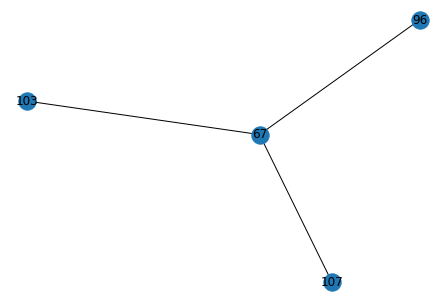

match_branches = [[96, 103], [67, 107]]
edges_to_delete (resolve crossover) = [[67, 96], [67, 103], [96, 107], [103, 107]]
edges_to_create (resolve crossover) = [[96, 103], [67, 107]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(79, 75), (75, 76), (76, 67), (96, 94)]
G.nodes() = [79, 75, 76, 67, 96, 94]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[67, 96], [67, 103], [96, 107], [103, 107]]
edges_to_create = [[96, 103], [67, 107]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 

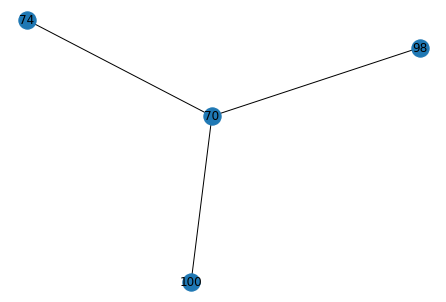

match_branches = [[70, 100], [74, 98]]
edges_to_delete (resolve crossover) = [[70, 74], [70, 98], [74, 100], [98, 100]]
edges_to_create (resolve crossover) = [[70, 100], [74, 98]]
curr_limb.deleted_edges 5 =[[67, 96], [67, 103], [96, 107], [103, 107]]
nx.number_connected_components(G) before = 1
G.edges() = [(79, 75), (75, 76), (76, 80), (80, 78), (78, 99), (99, 90), (90, 66), (66, 70), (98, 115), (115, 132), (132, 133), (133, 130), (130, 124), (124, 105)]
G.nodes() = [79, 75, 76, 80, 78, 99, 90, 66, 70, 98, 115, 132, 133, 130, 124, 105]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[70, 74], [70, 98], [74, 100], [98, 100]]
edges_to_create = [[70, 100], [74, 98]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,

  Edge: [79 75]: curr_angle = 21.31
  Edge: [75 76]: curr_angle = 15.6
  Edge: [76 80]: curr_angle = 26.36
  Edge: [80 50]: curr_angle = 76.56
  Edge: [50 42]: curr_angle = 55.93
  Edge: [42 44]: curr_angle = 39.41
  Edge: [44 45]: curr_angle = 122.92
  Edge: [45 46]: curr_angle = 97.18

Total time for doubling_back = 0.6451611518859863
There were 2 edges that passed doubling back threshold of 80
Winning edge [44 45] had a doubling back of 122.91630917902947
***inside resolve crossover!!!!****
coordinate_branches = [38, 44, 45]
38 = red
44 = aqua
45 = purple
Angle between 38 and 44 = 32.26 
Angle between 38 and 45 = 38.8 
Angle between 44 and 45 = 111.21 
Final Matches = [[38, 44]]
matched_branches_revised = [[38, 44]]
Original graph


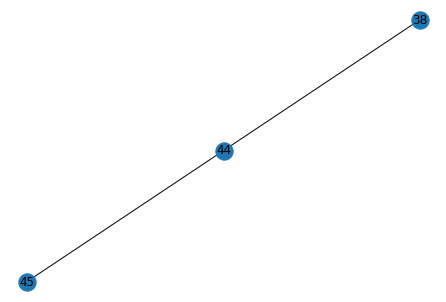

match_branches = [[38, 44]]
edges_to_delete (resolve crossover) = [[38, 45], [44, 45]]
edges_to_create (resolve crossover) = [[38, 44]]
edges_to_delete (cut_limb_network) = [array([38, 45]), array([44, 45])]
edges_to_create = [[38, 44]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 87, 88, 89, 90, 91, 92, 93, 95, 97, 99, 100, 101, 102, 106, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 121, 122, 123, 127, 128, 140, 141, 145, 146, 147, 148, 149}
Comp 1 = {96, 103, 71, 84, 86, 94}
Comp 2 = {129, 6, 45, 142, 46}
Comp 3 = {130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 2, 143, 144, 21, 23, 30, 35, 36, 51, 61, 62, 65, 68, 74, 81, 85, 98, 105, 113, 114, 115, 120, 124, 125, 126}
Comp 4 = {104}
curr_limb_copy.deleted_edges = [[67, 9

  Edge: [15 24]: curr_angle = 44.78
  Edge: [24 33]: curr_angle = 28.87
  Edge: [33 43]: curr_angle = 76.72
  Edge: [43 40]: curr_angle = 34.71
  Edge: [40 39]: curr_angle = 32.7
  Edge: [39 28]: curr_angle = 102.7
  Edge: [28 29]: curr_angle = 68.73
  Edge: [29 72]: curr_angle = 14.53
  Edge: [72 91]: curr_angle = 45.83
  Edge: [91 94]: curr_angle = 57.93
  Edge: [94 95]: curr_angle = 24.67
  Edge: [95 97]: curr_angle = 37.68

Total time for doubling_back = 0.5412414073944092
There were 1 edges that passed doubling back threshold of 80
Winning edge [39 28] had a doubling back of 102.70119372303665
***inside resolve crossover!!!!****
coordinate_branches = [28, 39, 41]
28 = red
39 = aqua
41 = purple
Angle between 28 and 39 = 99.72 
Angle between 28 and 41 = 78.09 
Angle between 39 and 41 = 30.93 
Final Matches = [[39, 41]]
matched_branches_revised = [[39, 41]]
Original graph


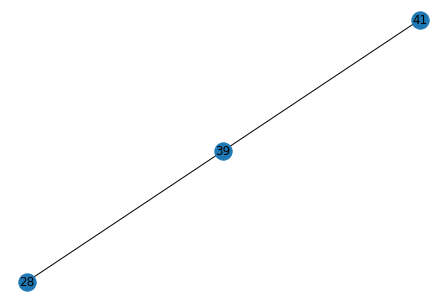

match_branches = [[39, 41]]
edges_to_delete (resolve crossover) = [[28, 39], [28, 41]]
edges_to_create (resolve crossover) = [[39, 41]]
edges_to_delete (cut_limb_network) = [array([28, 39]), array([28, 41])]
edges_to_create = [[39, 41]]
Number of connected components = 2
Comp 0 = {1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87.0, 88, 89, 99, 101, 102, 106, 108, 109, 110, 113, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 184, 185, 186, 193, 194, 196, 197, 198, 199, 201, 202, 204, 205, 206}
Comp 1 = {0, 128, 3, 4,

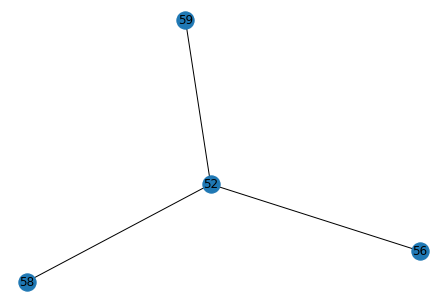

match_branches = []
edges_to_delete (resolve crossover) = [[52, 56], [52, 58], [52, 59], [56, 58], [56, 59], [58, 59]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[array([28, 39]), array([28, 41])]
nx.number_connected_components(G) before = 1
G.edges() = [(14, 15), (15, 24), (24, 33), (33, 44), (44, 52), (56, 64), (64, 68), (68, 75), (75, 79), (79, 85), (85, 86), (86, 113), (113, 126), (126, 147), (147, 151), (151, 163), (163, 165), (165, 170)]
G.nodes() = [14, 15, 24, 33, 44, 52, 56, 64, 68, 75, 79, 85, 86, 113, 126, 147, 151, 163, 165, 170]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
Skipping endnode 14 because skeletal distance was 1678.7380902403754 and threshold was 2500
Skipping endnode 170 because skeletal distance was 551.2774792321115 and threshold was 2500
skip_nodes = [14, 170]
edges_to_delete (cut_limb_network) = [[52, 56], [52, 58], [52, 59], [56, 58], [56, 59], [58, 59]]
e

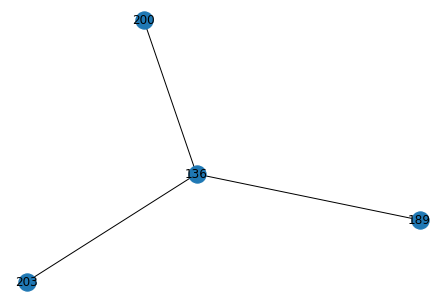

match_branches = [[136, 203], [189, 200]]
edges_to_delete (resolve crossover) = [[136, 189], [136, 200], [189, 203], [200, 203]]
edges_to_create (resolve crossover) = [[136, 203], [189, 200]]
curr_limb.deleted_edges 5 =[array([28, 39]), array([28, 41]), [52, 56], [52, 58], [52, 59], [56, 58], [56, 59], [58, 59]]
nx.number_connected_components(G) before = 1
G.edges() = [(97, 98), (98, 100), (100, 104), (104, 107), (107, 112), (112, 114), (114, 136), (189, 192), (192, 167), (167, 181)]
G.nodes() = [97, 98, 100, 104, 107, 112, 114, 136, 189, 192, 167, 181]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[136, 189], [136, 200], [189, 203], [200, 203]]
edges_to_create = [[136, 203], [189, 200]]
Number of connected components = 15
Comp 0 = {1, 8, 9, 10, 16, 56, 62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 79, 81, 82, 83, 85, 86, 89, 99, 101, 102, 106, 108, 109, 110, 113, 

No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [170 165]: curr_angle = 43.69
  Edge: [165 173]: curr_angle = 94.46

Total time for doubling_back = 0.21432733535766602
There were 1 edges that passed doubling back threshold of 80
Winning edge [165 173] had a doubling back of 94.4639431316442
***inside resolve crossover!!!!****
coordinate_branches = [163, 165, 173]
163 = red
165 = aqua
173 = purple
Angle between 163 and 165 = 59.63 
Angle between 163 and 173 = 53.52 
Angle between 165 and 173 = 67.43 
Final Matches = []
matched_branches_revised = []
Original graph


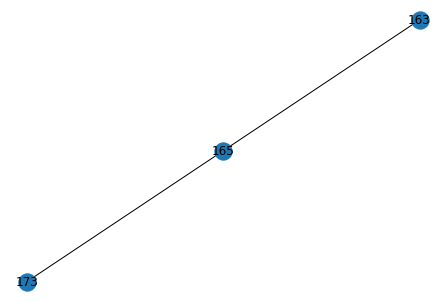

match_branches = []
edges_to_delete (resolve crossover) = [[163, 165], [163, 173], [165, 173]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([163, 165]), array([163, 173]), array([165, 173])]
edges_to_create = []
Number of connected components = 17
Comp 0 = {160, 165, 169, 170, 171, 179, 183, 185, 186}
Comp 1 = {1, 8, 9, 10, 16, 56, 62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 79, 81, 82, 83, 85, 86, 89, 99, 101, 102, 106, 108, 109, 110, 113, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 163, 164, 166, 168, 172, 174, 175, 176, 177, 180, 182, 184, 193, 194, 196, 197, 198, 199, 201, 202, 204, 205, 206}
Comp 2 = {173}
Comp 3 = {2, 6, 7, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55}
Comp 4 = {58}
Comp 5 = {5

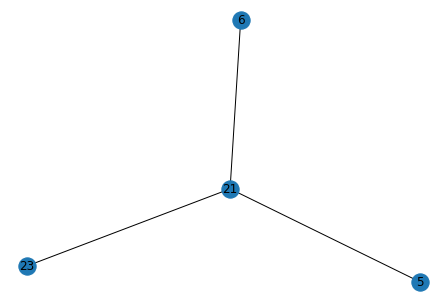

match_branches = [[5, 23], [6, 21]]
edges_to_delete (resolve crossover) = [[5, 6], [5, 21], [6, 23], [21, 23]]
edges_to_create (resolve crossover) = [[5, 23], [6, 21]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(29, 25), (25, 20), (20, 21), (23, 37), (37, 35), (35, 33), (33, 31)]
G.nodes() = [29, 25, 20, 21, 23, 37, 35, 33, 31]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 6], [5, 21], [6, 23], [21, 23]]
edges_to_create = [[5, 23], [6, 21]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30}
Comp 1 = {3, 4, 5, 13, 23, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}
Comp 2 = {22}
curr_limb_copy.deleted_edges = [[5, 6], [5, 21], [6, 23], [21, 23]]
curr_limb_copy.created

  Edge: [31 33]: curr_angle = 107.77

Total time for doubling_back = 0.058115482330322266
There were 1 edges that passed doubling back threshold of 80
Winning edge [31 33] had a doubling back of 107.76991612616159
***inside resolve crossover!!!!****
coordinate_branches = [31, 32, 33]
31 = red
32 = aqua
33 = purple
Angle between 31 and 32 = 57.96 
Angle between 31 and 33 = 106.09 
Angle between 32 and 33 = 17.85 
Final Matches = [[32, 33]]
matched_branches_revised = [[32, 33]]
Original graph


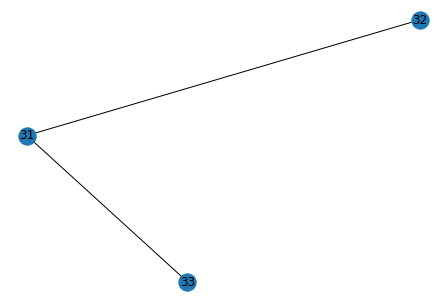

match_branches = [[32, 33]]
edges_to_delete (resolve crossover) = [[31, 32], [31, 33]]
edges_to_create (resolve crossover) = [[32, 33]]
edges_to_delete (cut_limb_network) = [array([31, 32]), array([31, 33])]
edges_to_create = [[32, 33]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30}
Comp 1 = {3, 4, 5, 13, 23, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}
Comp 2 = {31}
Comp 3 = {22}
curr_limb_copy.deleted_edges = [[5, 6], [5, 21], [6, 23], [21, 23], array([31, 32]), array([31, 33])]
curr_limb_copy.created_edges = [[5, 23], [6, 21], [32, 33]]
After get best cut: cut_edges = [array([31, 32]), array([31, 33])], added_edges = [[32, 33]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTI

  Edge: [33 35]: curr_angle = 16.7
  Edge: [35 34]: curr_angle = 62.81

Total time for doubling_back = 0.1131906509399414

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [33 35]: jump = 21.97
  Edge: [35 34]: jump = 67.52
Total time for width = 0.04632115364074707
Did not find an error edge in either of the paths
Number of connected components = 4
Comp 0 = {0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30}
Comp 1 = {3, 4, 5, 13, 23, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}
Comp 2 = {31}
Comp 3 = {22}
curr_limb_copy.deleted_edges = [[5, 6], [5, 21], [6, 23], [21, 23], array([31, 32]), array([31, 33])]
curr_limb_copy.created_edges = [[5, 23], [6, 21], [32, 33]]
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***


---- working on discon

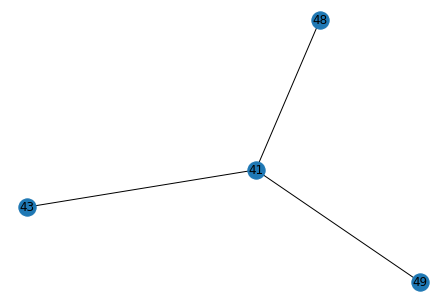

match_branches = [[43, 48], [41, 49]]
edges_to_delete (resolve crossover) = [[41, 43], [41, 48], [43, 49], [48, 49]]
edges_to_create (resolve crossover) = [[43, 48], [41, 49]]
curr_limb.deleted_edges 5 =[[5, 6], [5, 21], [6, 23], [21, 23], array([31, 32]), array([31, 33])]
nx.number_connected_components(G) before = 1
G.edges() = [(33, 36), (36, 39), (39, 41), (43, 40)]
G.nodes() = [33, 36, 39, 41, 43, 40]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 43], [41, 48], [43, 49], [48, 49]]
edges_to_create = [[43, 48], [41, 49]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30}
Comp 1 = {32, 33, 34, 3, 4, 37, 5, 35, 38, 36, 39, 41, 42, 13, 49, 23, 56, 57}
Comp 2 = {31}
Comp 3 = {40, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55}
Comp 4 = {22}
Comp 5 = {47}
curr_limb_copy.delet

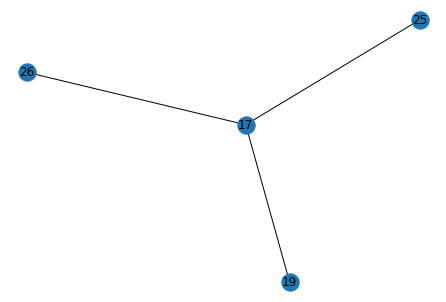

match_branches = [[17, 26], [19, 25]]
edges_to_delete (resolve crossover) = [[17, 19], [17, 25], [19, 26], [25, 26]]
edges_to_create (resolve crossover) = [[17, 26], [19, 25]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(16, 17), (19, 15), (15, 20)]
G.nodes() = [16, 17, 19, 15, 20]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 19], [17, 25], [19, 26], [25, 26]]
edges_to_create = [[17, 26], [19, 25]]
Number of connected components = 2
Comp 0 = {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 26, 27, 28}
Comp 1 = {0, 1, 2, 3, 4, 15, 18, 19, 20, 21, 22, 23, 24, 25}
curr_limb_copy.deleted_edges = [[17, 19], [17, 25], [19, 26], [25, 26]]
curr_limb_copy.created_edges = [[17, 26], [19, 25]]
After get best cut: cut_edges = [[17, 19], [17, 25], [19, 26], [25, 26]], added_edges = [[17, 26], [19, 25]]
total_soma_paths_to_cut =

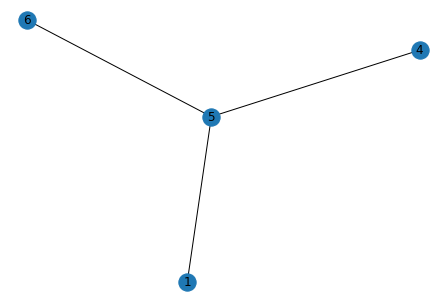

match_branches = [[1, 4]]
edges_to_delete (resolve crossover) = [[1, 5], [1, 6], [4, 5], [4, 6], [5, 6]]
edges_to_create (resolve crossover) = [[1, 4]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(0, 3), (3, 5)]
G.nodes() = [0, 3, 5, 1]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 5], [1, 6], [4, 5], [4, 6], [5, 6]]
edges_to_create = [[1, 4]]
Number of connected components = 4
Comp 0 = {8, 1, 4, 7}
Comp 1 = {0, 2, 3, 5, 9, 11, 12, 13, 14}
Comp 2 = {6}
Comp 3 = {10}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [4, 5], [4, 6], [5, 6]]
curr_limb_copy.created_edges = [[1, 4]]
After get best cut: cut_edges = [[1, 5], [1, 6], [4, 5], [4, 6], [5, 6]], added_edges = [[1, 4]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIO

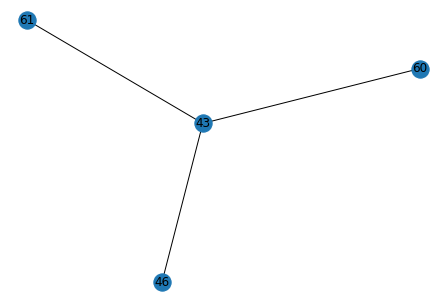

match_branches = [[46, 61]]
edges_to_delete (resolve crossover) = [[43, 46], [43, 60], [43, 61], [46, 60], [60, 61]]
edges_to_create (resolve crossover) = [[46, 61]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(39, 34), (34, 24), (24, 22), (22, 19), (19, 17), (17, 25), (25, 32), (32, 33), (33, 38), (38, 43), (46, 52)]
G.nodes() = [39, 34, 24, 22, 19, 17, 25, 32, 33, 38, 43, 46, 52]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[43, 46], [43, 60], [43, 61], [46, 60], [60, 61]]
edges_to_create = [[46, 61]]
Number of connected components = 4
Comp 0 = {1, 70, 72, 46, 52, 61}
Comp 1 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 62, 63, 64, 65, 66, 67, 

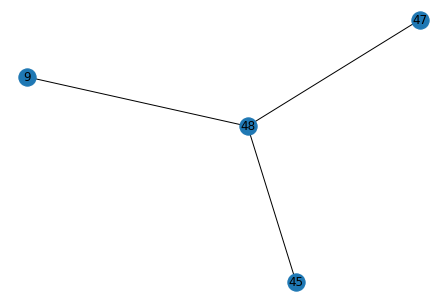

match_branches = [[45, 47], [9, 48]]
edges_to_delete (resolve crossover) = [[9, 45], [9, 47], [45, 48], [47, 48]]
edges_to_create (resolve crossover) = [[45, 47], [9, 48]]
curr_limb.deleted_edges 5 =[[43, 46], [43, 60], [43, 61], [46, 60], [60, 61]]
nx.number_connected_components(G) before = 1
G.edges() = [(39, 40), (40, 48), (45, 53)]
G.nodes() = [39, 40, 48, 45, 53]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[9, 45], [9, 47], [45, 48], [47, 48]]
edges_to_create = [[45, 47], [9, 48]]
Number of connected components = 5
Comp 0 = {1, 70, 72, 46, 52, 61}
Comp 1 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 54, 55, 56, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 2 = {60}
Comp 3 

  Edge: [14 13]: curr_angle = 40.22
  Edge: [13  8]: curr_angle = 13.27
  Edge: [8 9]: curr_angle = 51.64
  Edge: [ 9 10]: curr_angle = 142.43
  Edge: [10 15]: curr_angle = 33.01
  Edge: [15 18]: curr_angle = 58.04

Total time for doubling_back = 0.6889352798461914
There were 1 edges that passed doubling back threshold of 80
Winning edge [ 9 10] had a doubling back of 142.426564439923
***inside resolve crossover!!!!****
coordinate_branches = [6, 9, 10]
6 = red
9 = aqua
10 = purple
Angle between 6 and 9 = 44.07 
Angle between 6 and 10 = 11.06 
Angle between 9 and 10 = 128.41 
Final Matches = [[6, 10]]
matched_branches_revised = [[6, 10]]
Original graph


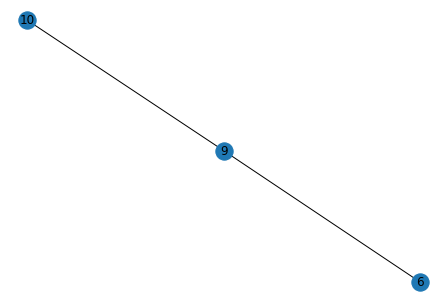

match_branches = [[6, 10]]
edges_to_delete (resolve crossover) = [[6, 9], [9, 10]]
edges_to_create (resolve crossover) = [[6, 10]]
edges_to_delete (cut_limb_network) = [array([6, 9]), array([ 9, 10])]
edges_to_create = [[6, 10]]
Number of connected components = 2
Comp 0 = {3, 6, 7, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
Comp 1 = {0, 1, 2, 4, 5, 8, 9, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [array([6, 9]), array([ 9, 10])]
curr_limb_copy.created_edges = [[6, 10]]
After get best cut: cut_edges = [array([6, 9]), array([ 9, 10])], added_edges = [[6, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 14 and 35
---- This disconnects S0_3 from S0_0  
 Cut iter

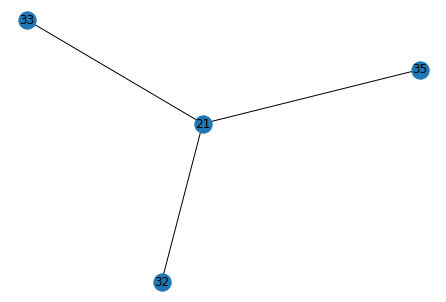

match_branches = [[21, 35]]
edges_to_delete (resolve crossover) = [[21, 32], [21, 33], [32, 33], [32, 35], [33, 35]]
edges_to_create (resolve crossover) = [[21, 35]]
curr_limb.deleted_edges 5 =[array([6, 9]), array([ 9, 10])]
nx.number_connected_components(G) before = 1
G.edges() = [(18, 19), (19, 23), (23, 20), (20, 21), (21, 35)]
G.nodes() = [18, 19, 23, 20, 21, 35]
nx.number_connected_components(G) after = 1
NOT USING the resolve crossover delete edges because not help resolve the cut
Skipping endnode 35 because skeletal distance was 784.8976047867644 and threshold was 2500
skip_nodes = [35]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [18 19]: curr_angle = 55.05
  Edge: [19 23]: curr_angle = 24.73
  Edge: [23 20]: curr_angle = 143.07
  Edge: [20 21]: curr_angle = 63.9

Total time for doubling_back = 0.11661267280578613
There were 1 edges that passed doubling back threshold of 80
Winning edge [23 20] had a doubling back of 143.06683104412357
***inside resolve crossover!!!!****
coordinate_branches = [20, 23, 24]
20 = red
23 = aqua
24 = purple
Angle between 20 and 23 = 168.36 
Angle between 20 and 24 = 8.3 
Angle between 23 and 24 = 6.82 
Final Matches = [[20, 24], [23, 24]]
matched_branches_revised = [[23, 24]]
Original graph


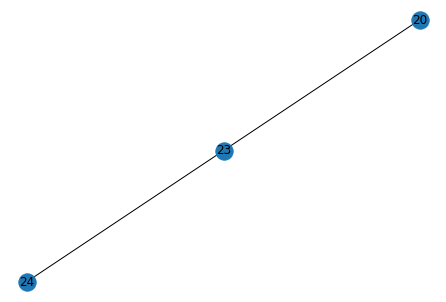

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
edges_to_delete (cut_limb_network) = [array([20, 23]), array([20, 24])]
edges_to_create = [[23, 24]]
Number of connected components = 4
Comp 0 = {32, 33, 35, 3, 37, 36, 39, 40, 41, 42, 38, 20, 21, 31}
Comp 1 = {6, 7, 10, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30}
Comp 2 = {0, 1, 2, 4, 5, 8, 9, 11, 12, 13, 14}
Comp 3 = {34}
curr_limb_copy.deleted_edges = [array([6, 9]), array([ 9, 10]), array([20, 23]), array([20, 24])]
curr_limb_copy.created_edges = [[6, 10], [23, 24]]
After get best cut: cut_edges = [array([20, 23]), array([20, 24])], added_edges = [[23, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working 

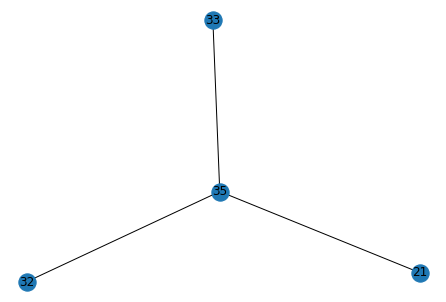

match_branches = [[21, 35]]
edges_to_delete (resolve crossover) = [[21, 32], [21, 33], [32, 33], [32, 35], [33, 35]]
edges_to_create (resolve crossover) = [[21, 35]]
curr_limb.deleted_edges 5 =[array([6, 9]), array([ 9, 10]), array([20, 23]), array([20, 24])]
nx.number_connected_components(G) before = 1
G.edges() = [(33, 36), (36, 40), (40, 39), (39, 38)]
G.nodes() = [35, 33, 36, 40, 39, 38]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
Skipping endnode 35 because skeletal distance was 784.8976047867644 and threshold was 2500
skip_nodes = [35]
edges_to_delete (cut_limb_network) = [[21, 32], [21, 33], [32, 33], [32, 35], [33, 35]]
edges_to_create = [[21, 35]]
Number of connected components = 6
Comp 0 = {3, 35, 20, 21}
Comp 1 = {32}
Comp 2 = {33, 36, 37, 38, 39, 40, 41, 42, 31}
Comp 3 = {6, 7, 10, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30}
Comp 4 = {0, 1, 2, 4, 5, 8, 9, 11, 12, 13, 14}
Comp 5 = {34}
c

  Edge: [0 4]: curr_angle = 25.37
  Edge: [ 4 11]: curr_angle = 58.42
  Edge: [11 12]: curr_angle = 32.32
  Edge: [12 23]: curr_angle = 97.93
  Edge: [23 21]: curr_angle = 95.02
  Edge: [21 16]: curr_angle = 8.78
  Edge: [16  9]: curr_angle = 18.28
  Edge: [9 5]: curr_angle = 22.74
  Edge: [5 1]: curr_angle = 45.36

Total time for doubling_back = 0.6205143928527832
There were 2 edges that passed doubling back threshold of 80
Winning edge [12 23] had a doubling back of 97.92593953431843
***inside resolve crossover!!!!****
coordinate_branches = [12, 23, 24]
12 = red
23 = aqua
24 = purple
Angle between 12 and 23 = 84.79 
Angle between 12 and 24 = 22.78 
Angle between 23 and 24 = 95.22 
Final Matches = [[12, 24]]
matched_branches_revised = [[12, 24]]
Original graph


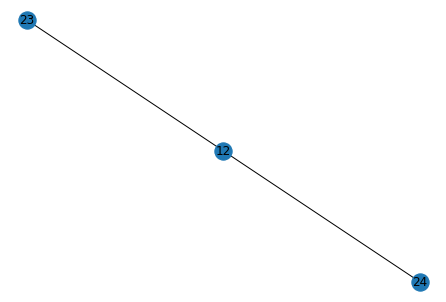

match_branches = [[12, 24]]
edges_to_delete (resolve crossover) = [[12, 23], [23, 24]]
edges_to_create (resolve crossover) = [[12, 24]]
edges_to_delete (cut_limb_network) = [array([12, 23]), array([23, 24])]
edges_to_create = [[12, 24]]
Number of connected components = 2
Comp 0 = {1, 3, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Comp 1 = {0, 2, 4, 10, 11, 12, 13, 24, 25, 26, 27, 28}
curr_limb_copy.deleted_edges = [array([12, 23]), array([23, 24])]
curr_limb_copy.created_edges = [[12, 24]]
After get best cut: cut_edges = [array([12, 23]), array([23, 24])], added_edges = [[12, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 1,  3,  5,  6,  7,  8,  9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]), ar

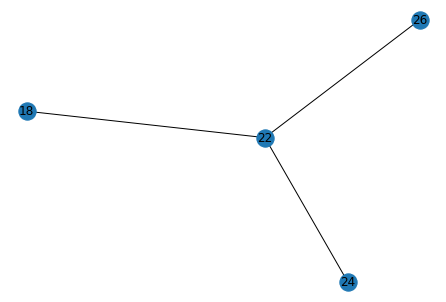

match_branches = [[18, 22]]
edges_to_delete (resolve crossover) = [[18, 24], [18, 26], [22, 24], [22, 26], [24, 26]]
edges_to_create (resolve crossover) = [[18, 22]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(48, 49), (49, 46), (46, 43), (43, 42), (42, 40), (40, 33), (33, 31), (31, 22), (22, 18), (18, 19), (19, 20), (20, 15), (15, 37), (37, 44), (44, 47), (47, 51)]
G.nodes() = [48, 49, 46, 43, 42, 40, 33, 31, 22, 18, 19, 20, 15, 37, 44, 47, 51]
nx.number_connected_components(G) after = 1
NOT USING the resolve crossover delete edges because not help resolve the cut
Picking [ 897481.5  320975.  1108825. ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
***inside resolve crossover!!!!****
coordinate_branches = [19, 20, 21, 27, 29, 30]
19 = red
20 = aqua
21 = purple
27 = green
Angle between 19 and 20 = 96.6 
Angle between 19 and 21 = 114.02 
Angle between 19 and 27 = 24.78 
Angle between 19 and 29 = 24.6 
Angle between 19 and 30 = 9

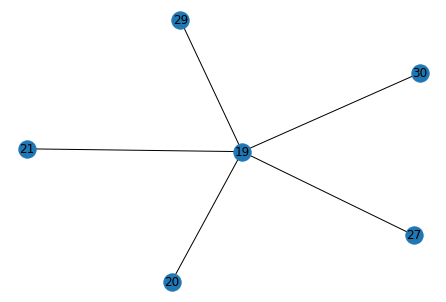

match_branches = [[20, 30], [19, 29]]
edges_to_delete (resolve crossover) = [[19, 20], [19, 21], [19, 27], [19, 30], [20, 21], [20, 27], [20, 29], [21, 27], [21, 29], [21, 30], [27, 29], [27, 30], [29, 30]]
edges_to_create (resolve crossover) = [[20, 30], [19, 29]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(48, 49), (49, 46), (46, 43), (43, 42), (42, 40), (40, 33), (33, 31), (31, 22), (22, 18), (18, 19), (20, 15), (15, 37), (37, 44), (44, 47), (47, 51)]
G.nodes() = [48, 49, 46, 43, 42, 40, 33, 31, 22, 18, 19, 20, 15, 37, 44, 47, 51]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 20], [19, 21], [19, 27], [19, 30], [20, 21], [20, 27], [20, 29], [21, 27], [21, 29], [21, 30], [27, 29], [27, 30], [29, 30]]
edges_to_create = [[20, 30], [19, 29]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 10

  Edge: [17 11]: curr_angle = 50.19
  Edge: [11 12]: curr_angle = 173.27
  Edge: [12 16]: curr_angle = 30.75
  Edge: [16 18]: curr_angle = 44.42
  Edge: [18 20]: curr_angle = 24.46
  Edge: [20 22]: curr_angle = 18.56

Total time for doubling_back = 0.7057359218597412
There were 1 edges that passed doubling back threshold of 80
Winning edge [11 12] had a doubling back of 173.2726440215657
***inside resolve crossover!!!!****
coordinate_branches = [8, 11, 12]
8 = red
11 = aqua
12 = purple
Angle between 8 and 11 = 7.29 
Angle between 8 and 12 = 57.19 
Angle between 11 and 12 = 115.68 
Final Matches = [[8, 11]]
matched_branches_revised = [[8, 11]]
Original graph


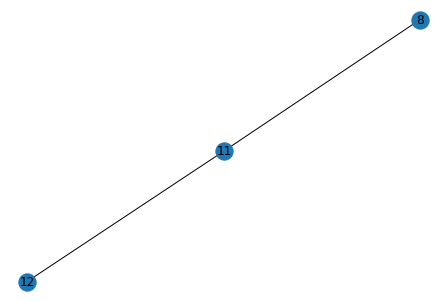

match_branches = [[8, 11]]
edges_to_delete (resolve crossover) = [[8, 12], [11, 12]]
edges_to_create (resolve crossover) = [[8, 11]]
edges_to_delete (cut_limb_network) = [array([ 8, 12]), array([11, 12])]
edges_to_create = [[8, 11]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19}
Comp 1 = {4, 5, 12, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
curr_limb_copy.deleted_edges = [array([ 8, 12]), array([11, 12])]
curr_limb_copy.created_edges = [[8, 11]]
After get best cut: cut_edges = [array([ 8, 12]), array([11, 12])], added_edges = [[8, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 19 and 23
---- This disconnects S0_0 from S0_2  
 Cut iteration 0
Total number of graphs at th

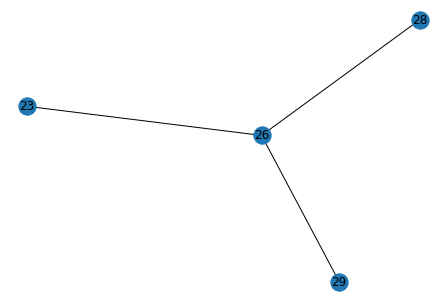

match_branches = [[23, 28]]
edges_to_delete (resolve crossover) = [[23, 26], [23, 29], [26, 28], [26, 29], [28, 29]]
edges_to_create (resolve crossover) = [[23, 28]]
curr_limb.deleted_edges 5 =[array([ 8, 12]), array([11, 12])]
nx.number_connected_components(G) before = 1
G.edges() = [(22, 20), (20, 21), (21, 26)]
G.nodes() = [22, 20, 21, 26, 23]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[23, 26], [23, 29], [26, 28], [26, 29], [28, 29]]
edges_to_create = [[23, 28]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19}
Comp 1 = {4, 5, 12, 14, 16, 18, 20, 21, 22, 24, 25, 26, 27}
Comp 2 = {28, 23}
Comp 3 = {29, 30, 31}
curr_limb_copy.deleted_edges = [array([ 8, 12]), array([11, 12]), [23, 26], [23, 29], [26, 28], [26, 29], [28, 29]]
curr_limb_copy.created_edges = [[8, 11], [23, 28]]
After get best cut: cut_edges = [[23,

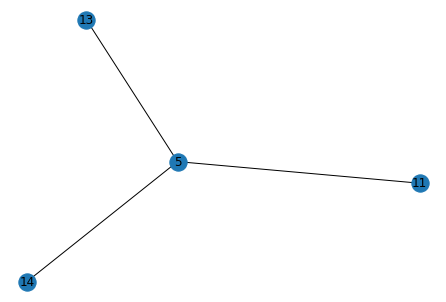

match_branches = [[11, 13]]
edges_to_delete (resolve crossover) = [[5, 11], [5, 13], [5, 14], [11, 14], [13, 14]]
edges_to_create (resolve crossover) = [[11, 13]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(18, 17), (17, 10), (10, 9), (9, 4), (4, 5), (14, 19)]
G.nodes() = [18, 17, 10, 9, 4, 5, 14, 19]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 11], [5, 13], [5, 14], [11, 14], [13, 14]]
edges_to_create = [[11, 13]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 15, 16, 17, 18}
Comp 1 = {11, 13}
Comp 2 = {19, 20, 14}
Comp 3 = {8}
Comp 4 = {12}
curr_limb_copy.deleted_edges = [[5, 11], [5, 13], [5, 14], [11, 14], [13, 14]]
curr_limb_copy.created_edges = [[11, 13]]
After get best cut: cut_edges = [[5, 11], [5, 13], [5, 14], [11, 14], [13, 14]], added_edges = [[11, 13]]
total_soma_path

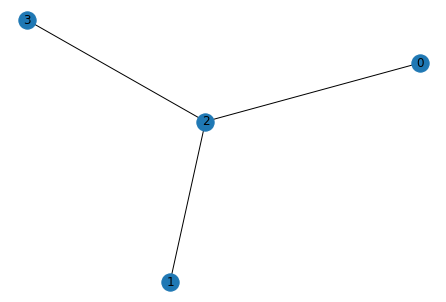

match_branches = []
edges_to_delete (resolve crossover) = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = []
G.nodes() = [2, 3]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
Skipping endnode 2 because skeletal distance was 961.0826464963078 and threshold was 2500
Skipping endnode 3 because skeletal distance was 1327.9482408766537 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {2}
Comp 1 = {0}
Comp 2 = {1}
Comp 3 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[0, 1], [0, 2], [0, 3], [1, 2

  Edge: [1 3]: curr_angle = 65.63
  Edge: [ 3 10]: curr_angle = 39.4
  Edge: [10  6]: curr_angle = 126.89
  Edge: [6 5]: curr_angle = 34.71

Total time for doubling_back = 0.6400854587554932
There were 1 edges that passed doubling back threshold of 80
Winning edge [10  6] had a doubling back of 126.89083699256328
***inside resolve crossover!!!!****
coordinate_branches = [6, 10, 12]
6 = red
10 = aqua
12 = purple
Angle between 6 and 10 = 78.84 
Angle between 6 and 12 = 26.1 
Angle between 10 and 12 = 92.76 
Final Matches = [[6, 12]]
matched_branches_revised = [[6, 12]]
Original graph


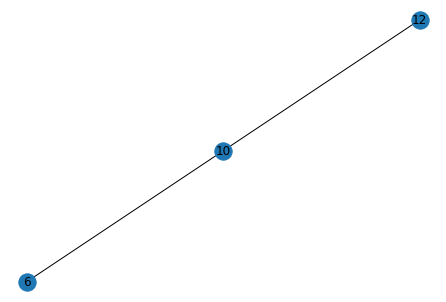

match_branches = [[6, 12]]
edges_to_delete (resolve crossover) = [[6, 10], [10, 12]]
edges_to_create (resolve crossover) = [[6, 12]]
edges_to_delete (cut_limb_network) = [array([ 6, 10]), array([10, 12])]
edges_to_create = [[6, 12]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 7, 8, 10, 11, 13, 14}
Comp 1 = {9, 12, 5, 6}
curr_limb_copy.deleted_edges = [array([ 6, 10]), array([10, 12])]
curr_limb_copy.created_edges = [[6, 12]]
After get best cut: cut_edges = [array([ 6, 10]), array([10, 12])], added_edges = [[6, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  7,  8, 10, 11, 13, 14]), array([ 9, 12,  5,  6])]
n_paths_cut = 1
using precomputed split suggestions


---Workin

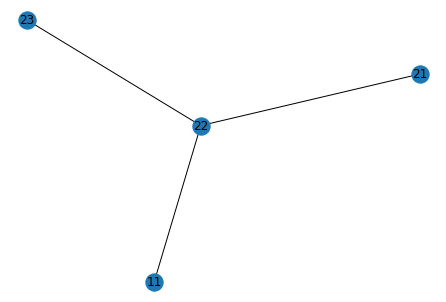

match_branches = [[11, 23]]
edges_to_delete (resolve crossover) = [[11, 21], [11, 22], [21, 22], [21, 23], [22, 23]]
edges_to_create (resolve crossover) = [[11, 23]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(45, 38), (38, 34), (34, 30), (30, 22), (23, 27), (27, 50), (50, 52), (52, 48), (48, 47)]
G.nodes() = [45, 38, 34, 30, 22, 23, 27, 50, 52, 48, 47]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
Skipping endnode 45 because skeletal distance was 425.5579596138214 and threshold was 2500
skip_nodes = [45]
edges_to_delete (cut_limb_network) = [[11, 21], [11, 22], [21, 22], [21, 23], [22, 23]]
edges_to_create = [[11, 23]]
Number of connected components = 3
Comp 0 = {2, 3, 6, 8, 9, 11, 12, 13, 18, 20, 23, 24, 25, 26, 27, 28, 29, 31, 32, 35, 37, 39, 41, 47, 48, 50, 51, 52, 53, 54, 59, 61, 62, 63, 64, 65, 66, 68, 69, 72, 79, 80}
Comp 1 = {7, 14, 15, 17, 21}
Comp 2 = {0, 1,

  Edge: [41 37]: curr_angle = 23.32
  Edge: [37 38]: curr_angle = 42.72
  Edge: [38 49]: curr_angle = 56.24
  Edge: [49 55]: curr_angle = 13.14
  Edge: [55 73]: curr_angle = 13.66
  Edge: [73 74]: curr_angle = 18.62

Total time for doubling_back = 0.6984982490539551

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [41 37]: jump = -148.22
  Edge: [37 38]: jump = -14.44
  Edge: [38 49]: jump = -209.66
  Edge: [49 55]: jump = 295.43
Adding error edge [49 55] because width jump was 295.42712519603583
  Edge: [55 73]: jump = 124.79
  Edge: [73 74]: jump = 186.96
Total time for width = 0.5664176940917969
first_error_sizes = [295.42712519603583, 209.66217152444332], first_error_locations = [3, 3], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [49, 53, 55]
49 = red
53 = aqua
55 = purple
Angle between 49 and 53 = 104.47 
Angle between 49 and 55 = 2.21 
Angle between 53 and 55 = 77.1 
Final Matches = [[49, 

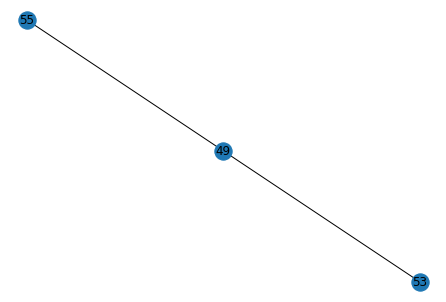

match_branches = [[49, 55]]
edges_to_delete (resolve crossover) = [[49, 53], [53, 55]]
edges_to_create (resolve crossover) = [[49, 55]]
Rejecting creating edge [49, 55] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([49, 53]), array([49, 55]), array([53, 55])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {34, 35, 37, 38, 39, 41, 11, 48, 49, 19, 28}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 70, 71}
Comp 2 = {64, 69, 72, 73, 74, 55, 63}
curr_limb_copy.deleted_edges = [array([49, 53]), array([49, 55]), array([53, 55])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([49, 53]), array([49, 55]), array([53, 55])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total numb

In [13]:
import time
import random
pru = reload(pru)
nru = reload(nru)
import neuron
neuron = reload(neuron)

start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    DecompositionSplit.populate(reserve_jobs=True, suppress_errors=True)
else:
    DecompositionSplit.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for DecompositionSplit populate = {time.time() - start_time}")